<h1><center> Facial Emotion Classification - Deep Learning </center></h1>

# I. General imports

In [0]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [0]:
### General imports ###
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from time import sleep
import re
import os
import argparse
from collections import OrderedDict
import matplotlib.animation as animation

### Image processing ###
from scipy.ndimage import zoom
from scipy.spatial import distance
import imutils
from scipy import ndimage
import cv2
#import dlib
from imutils import face_utils

### CNN models ###
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.utils import np_utils
from keras.regularizers import l2#, activity_l2
from keras.optimizers import SGD, RMSprop
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras import models
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras import layers

### Build SVM models ###
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

### Same trained models ###
import h5py
from keras.models import model_from_json
import pickle

# II. Import datas

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### EYE

In [0]:
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/part_csv_train_test/train_test/eye/'
#local_path = 'C:/Users/1-6/DataAnalist/Jupyter_python/Emotion Recognition/part_csv_train_test/train_test/eye/'

In [0]:
eye_x_train = np.load(local_path + "X_train.npy")
eye_x_test = np.load(local_path + "X_test.npy")
eye_y_train = np.load(local_path + "y_train.npy")
eye_y_test = np.load(local_path + "y_test.npy")

In [0]:
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/part_csv_train_test/train_test/dot_eye/'
#local_path = 'C:/Users/1-6/DataAnalist/Jupyter_python/Emotion Recognition/part_csv_train_test/train_test/dot_eye/'

In [0]:
dot_eye_x_train = np.load(local_path + "X_train.npy")
dot_eye_x_test = np.load(local_path + "X_test.npy")
dot_eye_y_train = np.load(local_path + "y_train.npy")
dot_eye_y_test = np.load(local_path + "y_test.npy")

### Nose

In [0]:
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/part_csv_train_test/train_test/nose/'
#local_path = 'C:/Users/1-6/DataAnalist/Jupyter_python/Emotion Recognition/part_csv_train_test/train_test/nose/'

In [0]:
nose_x_train = np.load(local_path + "X_train.npy")
nose_x_test = np.load(local_path + "X_test.npy")
nose_y_train = np.load(local_path + "y_train.npy")
nose_y_test = np.load(local_path + "y_test.npy")

In [0]:
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/part_csv_train_test/train_test/dot_nose/'
#local_path = "C:/Users/1-6/DataAnalist/Jupyter_python/Emotion Recognition/part_csv_train_test/train_test/dot_nose/"

In [0]:
dot_nose_x_train = np.load(local_path + "X_train.npy")
dot_nose_x_test = np.load(local_path + "X_test.npy")
dot_nose_y_train = np.load(local_path + "y_train.npy")
dot_nose_y_test = np.load(local_path + "y_test.npy")

### Mouth

In [0]:
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/part_csv_train_test/train_test/mouth/'
#local_path = 'C:/Users/1-6/DataAnalist/Jupyter_python/Emotion Recognition/part_csv_train_test/train_test/mouth/'

In [0]:
mouth_x_train = np.load(local_path + "X_train.npy")
mouth_x_test = np.load(local_path + "X_test.npy")
mouth_y_train = np.load(local_path + "y_train.npy")
mouth_y_test = np.load(local_path + "y_test.npy")

In [0]:
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/part_csv_train_test/train_test/dot_mouth/'
#local_path = "C:/Users/1-6/DataAnalist/Jupyter_python/Emotion Recognition/part_csv_train_test/train_test/dot_mouth/"

In [0]:
dot_mouth_x_train = np.load(local_path + "X_train.npy")
dot_mouth_x_test = np.load(local_path + "X_test.npy")
dot_mouth_y_train = np.load(local_path + "y_train.npy")
dot_mouth_y_test = np.load(local_path + "y_test.npy")

### Total

In [0]:
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/part_csv_train_test/train_test/total/'
#local_path = 'C:/Users/1-6/DataAnalist/Jupyter_python/Emotion Recognition/part_csv_train_test/train_test/total/'

In [0]:
total_x_train = np.load(local_path + "X_train.npy")
total_x_test = np.load(local_path + "X_test.npy")
total_y_train = np.load(local_path + "y_train.npy")
total_y_test = np.load(local_path + "y_test.npy")

In [0]:
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/part_csv_train_test/train_test/dot_total/'
#local_path = "C:/Users/1-6/DataAnalist/Jupyter_python/Emotion Recognition/part_csv_train_test/train_test/dot_total/"

In [0]:
dot_total_x_train = np.load(local_path + "X_train.npy")
dot_total_x_test = np.load(local_path + "X_test.npy")
dot_total_y_train = np.load(local_path + "y_train.npy")
dot_total_y_test = np.load(local_path + "y_test.npy")

In [0]:
print("eye_x_train :", eye_x_train.shape)
print("nose_x_train :", nose_x_train.shape)
print("mouth_x_train :", mouth_x_train.shape)
print("==============================")
print("eye_y_train :", eye_y_train.shape)
print("nose_y_train :", nose_y_train.shape)
print("mouth_y_train :", mouth_y_train.shape)
print("==============================")
print("eye_x_test :", eye_x_test.shape)
print("nose_x_test :", nose_x_test.shape)
print("mouth_x_test :", mouth_x_test.shape)
print("==============================")
print("eye_y_test :", eye_y_test.shape)
print("nose_y_test :", nose_y_test.shape)
print("mouth_y_test :", mouth_y_test.shape)
print("==============================")
print("==============================")
print("dot_eye_x_train :", dot_eye_x_train.shape)
print("dot_nose_x_train :", dot_nose_x_train.shape)
print("dot_mouth_x_train :", dot_mouth_x_train.shape)
print("==============================")
print("dot_eye_y_train :", dot_eye_y_train.shape)
print("dot_nose_y_train :", dot_nose_y_train.shape)
print("dot_mouth_y_train :", dot_mouth_y_train.shape)
print("==============================")
print("dot_eye_x_test :", dot_eye_x_test.shape)
print("dot_nose_x_test :", dot_nose_x_test.shape)
print("dot_mouth_x_test :", dot_mouth_x_test.shape)
print("==============================")
print("dot_eye_y_test :", dot_eye_y_test.shape)
print("dot_nose_y_test :", dot_nose_y_test.shape)
print("dot_mouth_y_test :", dot_mouth_y_test.shape)

eye_x_train : (4398, 64, 64, 1)
nose_x_train : (4397, 64, 64, 1)
mouth_x_train : (4402, 64, 64, 1)
eye_y_train : (4398, 7)
nose_y_train : (4397, 7)
mouth_y_train : (4402, 7)
eye_x_test : (489, 64, 64, 1)
nose_x_test : (489, 64, 64, 1)
mouth_x_test : (490, 64, 64, 1)
eye_y_test : (489, 7)
nose_y_test : (489, 7)
mouth_y_test : (490, 7)
dot_eye_x_train : (4397, 64, 64, 1)
dot_nose_x_train : (4397, 64, 64, 1)
dot_mouth_x_train : (4398, 64, 64, 1)
dot_eye_y_train : (4397, 7)
dot_nose_y_train : (4397, 7)
dot_mouth_y_train : (4398, 7)
dot_eye_x_test : (489, 64, 64, 1)
dot_nose_x_test : (489, 64, 64, 1)
dot_mouth_x_test : (489, 64, 64, 1)
dot_eye_y_test : (489, 7)
dot_nose_y_test : (489, 7)
dot_mouth_y_test : (489, 7)


In [0]:
shape_x = 64
shape_y = 64
nRows,nCols,nDims = eye_x_train.shape[1:]
eye_input_shape = (nRows, nCols, nDims)
eye_classes = np.unique(eye_y_train)
eye_nClasses = len(eye_classes)

In [0]:
nRows,nCols,nDims = nose_x_train.shape[1:]
nose_input_shape = (nRows, nCols, nDims)
nose_classes = np.unique(nose_y_train)
nose_nClasses = len(nose_classes)

In [0]:
nRows,nCols,nDims = mouth_x_train.shape[1:]
mouth_input_shape = (nRows, nCols, nDims)
mouth_classes = np.unique(mouth_y_train)
mouth_nClasses = len(mouth_classes)

In [0]:
nRows,nCols,nDims = dot_eye_x_train.shape[1:]
dot_eye_input_shape = (nRows, nCols, nDims)
dot_eye_classes = np.unique(dot_eye_y_train)
dot_eye_nClasses = len(dot_eye_classes)

In [0]:
nRows,nCols,nDims = dot_nose_x_train.shape[1:]
dot_nose_input_shape = (nRows, nCols, nDims)
dot_nose_classes = np.unique(dot_nose_y_train)
dot_nose_nClasses = len(dot_nose_classes)

In [0]:
nRows,nCols,nDims = dot_mouth_x_train.shape[1:]
dot_mouth_input_shape = (nRows, nCols, nDims)
dot_mouth_classes = np.unique(dot_mouth_y_train)
dot_mouth_nClasses = len(dot_mouth_classes)

In [0]:
class_weight_eye = {
    0:sum(eye_y_train[:,0]), 
    1:sum(eye_y_train[:,1]), 
    2:sum(eye_y_train[:,2]), 
    3:sum(eye_y_train[:,3]),
    4:sum(eye_y_train[:,4]),
    5:sum(eye_y_train[:,5]),
    6:sum(eye_y_train[:,6])
}

class_weight_nose = {
    0:sum(nose_y_train[:,0]), 
    1:sum(nose_y_train[:,1]), 
    2:sum(nose_y_train[:,2]), 
    3:sum(nose_y_train[:,3]),
    4:sum(nose_y_train[:,4]),
    5:sum(nose_y_train[:,5]),
    6:sum(nose_y_train[:,6])
}

class_weight_mouth = {
    0:sum(mouth_y_train[:,0]), 
    1:sum(mouth_y_train[:,1]), 
    2:sum(mouth_y_train[:,2]), 
    3:sum(mouth_y_train[:,3]),
    4:sum(mouth_y_train[:,4]),
    5:sum(mouth_y_train[:,5]),
    6:sum(mouth_y_train[:,6])
}

In [0]:
class_weight_dot_eye = {
    0:sum(dot_eye_y_train[:,0]), 
    1:sum(dot_eye_y_train[:,1]), 
    2:sum(dot_eye_y_train[:,2]), 
    3:sum(dot_eye_y_train[:,3]),
    4:sum(dot_eye_y_train[:,4]),
    5:sum(dot_eye_y_train[:,5]),
    6:sum(dot_eye_y_train[:,6])
}

class_weight_dot_nose = {
    0:sum(dot_nose_y_train[:,0]), 
    1:sum(dot_nose_y_train[:,1]), 
    2:sum(dot_nose_y_train[:,2]), 
    3:sum(dot_nose_y_train[:,3]),
    4:sum(dot_nose_y_train[:,4]),
    5:sum(dot_nose_y_train[:,5]),
    6:sum(dot_nose_y_train[:,6])
}

class_weight_dot_mouth = {
    0:sum(dot_mouth_y_train[:,0]), 
    1:sum(dot_mouth_y_train[:,1]), 
    2:sum(dot_mouth_y_train[:,2]), 
    3:sum(dot_mouth_y_train[:,3]),
    4:sum(dot_mouth_y_train[:,4]),
    5:sum(dot_mouth_y_train[:,5]),
    6:sum(dot_mouth_y_train[:,6])
}

# IV. Build the model

In [0]:
def createModel():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), padding='same', input_shape=(64,64,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(7))
    model.add(Activation('softmax'))

    return model

Colab 전용 모델

In [0]:
def createModel():
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', input_shape=(64,64,1)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(512))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Dense(256))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Dense(7))
    model.add(tf.keras.layers.Activation('softmax'))

    return model

In [0]:
import tensorflow as tf
model = createModel()

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       5

And visualize the model architecture :

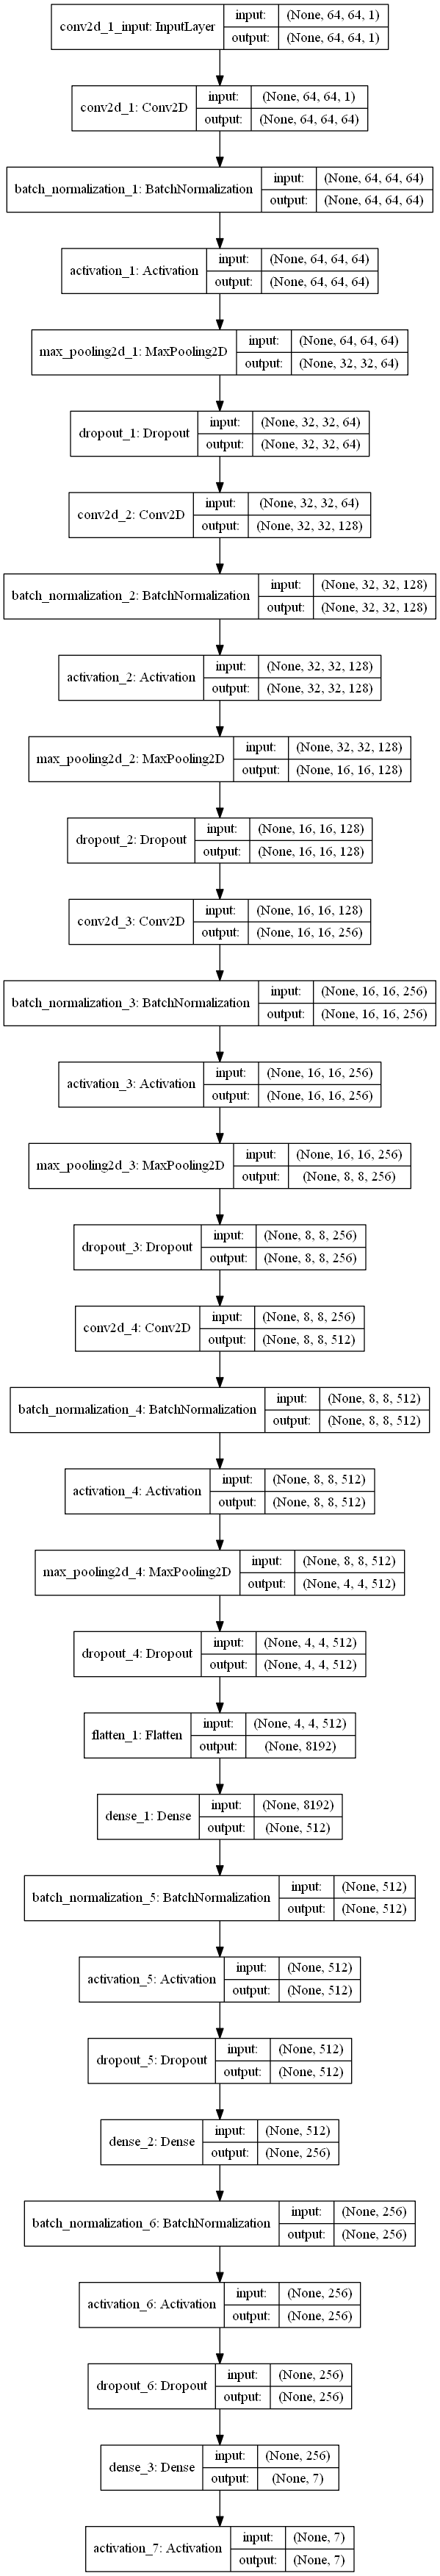

In [0]:
plot_model(model, to_file='G:/Python_Data/Senitment_data/Multimodal-Emotion-Recognition/03-Video/Images/Model_Images/model_plot.png', 
           show_shapes=True, show_layer_names=True)

To prevent overfitting, we can do data augmentation.

In [0]:
datagen_total = ImageDataGenerator(
        zoom_range=0.2,          # randomly zoom into images
        rotation_range=10,       # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,   # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,    # randomly flip images
        vertical_flip=False)     # randomly flip images

In [0]:
datagen_eye = ImageDataGenerator(
        zoom_range=0.2,          # randomly zoom into images
        rotation_range=10,       # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,   # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,    # randomly flip images
        vertical_flip=False)

In [0]:
datagen_nose = ImageDataGenerator(
        zoom_range=0.2,          # randomly zoom into images
        rotation_range=10,       # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,   # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,    # randomly flip images
        vertical_flip=False)

In [0]:
datagen_mouth = ImageDataGenerator(
        zoom_range=0.2,          # randomly zoom into images
        rotation_range=10,       # randomly rotate images in the range (de|grees, 0 to 180)
        width_shift_range=0.1,   # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,    # randomly flip images
        vertical_flip=False)

## Model Runing - Eye

In [0]:
#Creating 2nd model and training(fitting)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
batch_size = 128
epochs = 150

# Fit the model on the batches generated by datagen.flow().
history = model.fit_generator(
    datagen_eye.flow(eye_x_train, eye_y_train, batch_size=batch_size),
    steps_per_epoch=int(np.ceil(eye_x_train.shape[0] / float(batch_size))),
    epochs = epochs, 
    validation_data=(eye_x_test, eye_y_test), class_weight=class_weight_eye)

#save the model weights
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/'
json_string = model.to_json()
model.save_weights(local_path + 'savedmodels/model_simple_eye.h5')
open(local_path + 'savedmodels/model_simple_eye.json', 'w').write(json_string)
#model.save_weights(local_path + 'savedmodels/Emotion_Face_Detection_Model.h5')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 35 steps, validate on 489 samples
Epoch 1/150
35/35 [==============================] - 4s 105ms/step - loss: 1776.5093 - accuracy: 0.2970 - val_loss: 2356.9404 - val_accuracy: 0.2924
Epoch 2/150
35/35 [==============================] - 2s 67ms/step - loss: 1082.5726 - accuracy: 0.3595 - val_loss: 1176.2930 - val_accuracy: 0.3926
Epoch 3/150
35/35 [==============================] - 2s 67ms/step - loss: 985.4407 - accuracy: 0.4186 - val_loss: 888.9491 - val_accuracy: 0.5010
Epoch 4/150
35/35 [==============================] - 2s 66ms/step - loss: 925.0176 - accuracy: 0.4463 - val_loss: 874.8455 - val_accuracy: 0.5051
Epoch 5/150
35/35 [==============================] - 2s 68ms/step - loss: 873.1150 - accuracy: 0.4848 - val_loss: 791.1746 - val_accuracy: 0.5603
Epoch 6/150
35/35 [==============================] - 2s 67ms/step - loss: 831.5997 - accuracy: 0.5018 - val_loss: 805.6454 - val_accuracy: 0.5419
Epoch 7/150
35/35 [======

9697

# V. Evaluate the model

Text(0.5, 1.0, 'Accuracy Curves')

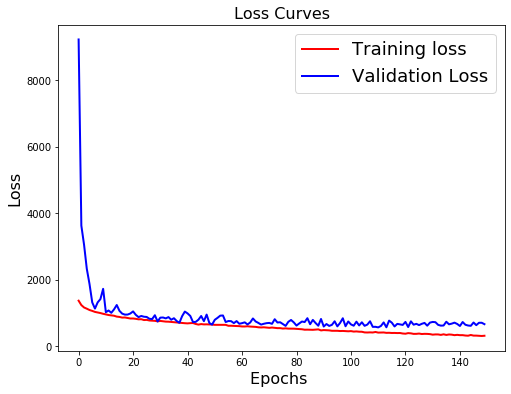

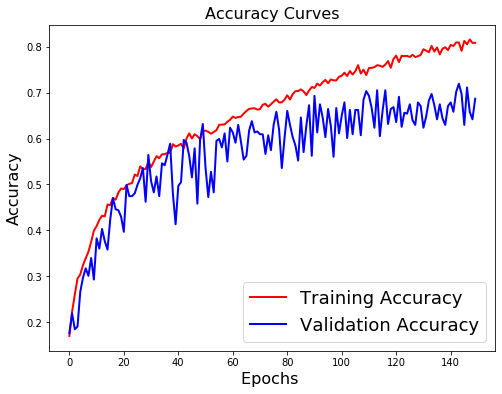

In [0]:
#Plotting accuracy and loss curves for 2nd model

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Model Runing - Nose

In [0]:
#Creating 2nd model and training(fitting)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
batch_size = 128
epochs = 150

# Fit the model on the batches generated by datagen.flow().
history = model.fit_generator(
    datagen_nose.flow(nose_x_train, nose_y_train, batch_size=batch_size),
    steps_per_epoch=int(np.ceil(nose_x_train.shape[0] / float(batch_size))),
    epochs = epochs, 
    validation_data=(nose_x_test, nose_y_test), class_weight=class_weight_nose)

#save the model weights
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/'
json_string = model.to_json()
model.save_weights(local_path + 'savedmodels/model_simple_nose.h5')
open(local_path + 'savedmodels/model_simple_nose.json', 'w').write(json_string)
#model.save_weights(local_path + 'savedmodels/Emotion_Face_Detection_Model.h5')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 35 steps, validate on 489 samples
Epoch 1/150
35/35 [==============================] - 4s 105ms/step - loss: 1639.5995 - accuracy: 0.2547 - val_loss: 3848.2044 - val_accuracy: 0.1370
Epoch 2/150
35/35 [==============================] - 2s 67ms/step - loss: 1120.1841 - accuracy: 0.3393 - val_loss: 2343.4709 - val_accuracy: 0.1677
Epoch 3/150
35/35 [==============================] - 2s 68ms/step - loss: 1064.9056 - accuracy: 0.3700 - val_loss: 1387.6496 - val_accuracy: 0.2454
Epoch 4/150
35/35 [==============================] - 2s 67ms/step - loss: 1018.2158 - accuracy: 0.3957 - val_loss: 1280.1223 - val_accuracy: 0.2597
Epoch 5/150
35/35 [==============================] - 2s 68ms/step - loss: 990.9167 - accuracy: 0.4132 - val_loss: 1004.5296 - val_accuracy: 0.3988
Epoch 6/150
35/35 [==============================] - 2s 70ms/step - loss: 966.7319 - accuracy: 0.4285 - val_loss: 958.0476 - val_accuracy: 0.4458
Epoch 7/150
35/35 [=

# V. Evaluate the model

Text(0.5, 1.0, 'Accuracy Curves')

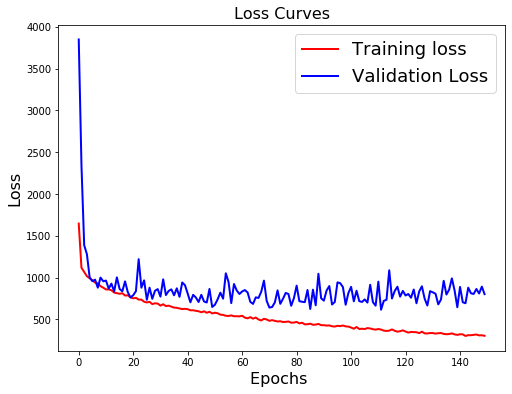

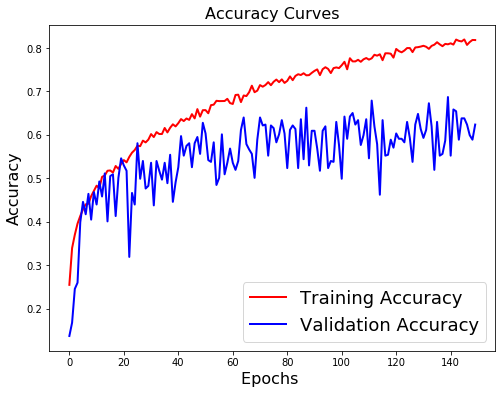

In [0]:
#Plotting accuracy and loss curves for 2nd model

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Model Runing - Mouth

In [0]:
#Creating 2nd model and training(fitting)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
batch_size = 128
epochs = 100

# Fit the model on the batches generated by datagen.flow().
history = model.fit_generator(
    datagen_mouth.flow(mouth_x_train, mouth_y_train, batch_size=batch_size),
    steps_per_epoch=int(np.ceil(mouth_x_train.shape[0] / float(batch_size))),
    epochs = epochs, 
    validation_data=(mouth_x_test, mouth_y_test), class_weight=class_weight_mouth)

#save the model weights
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/'
json_string = model.to_json()
model.save_weights(local_path + 'savedmodels/model_simple_mouth.h5')
open(local_path + 'savedmodels/model_simple_mouth.json', 'w').write(json_string)
#model.save_weights(local_path + 'savedmodels/Emotion_Face_Detection_Model.h5')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 35 steps, validate on 490 samples
Epoch 1/100
35/35 [==============================] - 4s 110ms/step - loss: 1244.5090 - accuracy: 0.2519 - val_loss: 11581.5505 - val_accuracy: 0.1429
Epoch 2/100
35/35 [==============================] - 2s 67ms/step - loss: 1113.6373 - accuracy: 0.3153 - val_loss: 1939.0004 - val_accuracy: 0.2245
Epoch 3/100
35/35 [==============================] - 2s 67ms/step - loss: 1079.8326 - accuracy: 0.3326 - val_loss: 1848.7516 - val_accuracy: 0.2571
Epoch 4/100
35/35 [==============================] - 2s 66ms/step - loss: 1020.6682 - accuracy: 0.3601 - val_loss: 1216.6901 - val_accuracy: 0.3163
Epoch 5/100
35/35 [==============================] - 2s 66ms/step - loss: 998.3666 - accuracy: 0.3789 - val_loss: 996.3867 - val_accuracy: 0.4020
Epoch 6/100
35/35 [==============================] - 2s 66ms/step - loss: 980.3443 - accuracy: 0.4023 - val_loss: 1046.5502 - val_accuracy: 0.3776
Epoch 7/100
35/35 [

9721

# V. Evaluate the model



Text(0.5, 1.0, 'Accuracy Curves')

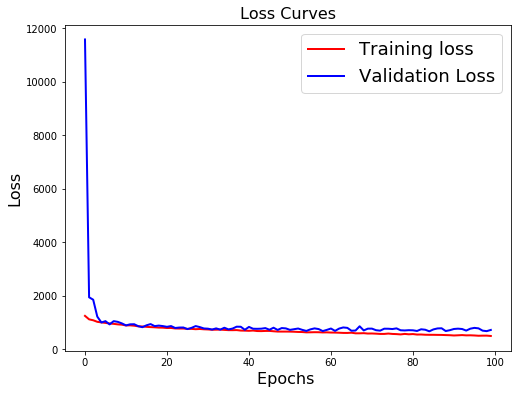

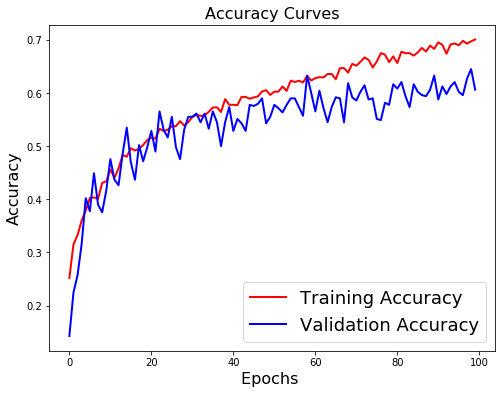

In [0]:
#Plotting accuracy and loss curves for 2nd model

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# Dot Model Runing - Eye

In [0]:
#Creating 2nd model and training(fitting)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
batch_size = 128
epochs = 150

# Fit the model on the batches generated by datagen.flow().
history = model.fit_generator(
    datagen_eye.flow(dot_eye_x_train, dot_eye_y_train, batch_size=batch_size),
    steps_per_epoch=int(np.ceil(dot_eye_x_train.shape[0] / float(batch_size))),
    epochs = epochs, 
    validation_data=(dot_eye_x_test, dot_eye_y_test), class_weight=class_weight_dot_eye)

#save the model weights
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/'
json_string = model.to_json()
model.save_weights(local_path + 'savedmodels/model_simple_dot_eye.h5')
open(local_path + 'savedmodels/model_simple_dot_eye.json', 'w').write(json_string)
#model.save_weights(local_path + 'savedmodels/Emotion_Face_Detection_Model.h5')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 35 steps, validate on 489 samples
Epoch 1/150
35/35 [==============================] - 4s 107ms/step - loss: 1877.1893 - accuracy: 0.1910 - val_loss: 13298.0522 - val_accuracy: 0.1575
Epoch 2/150
35/35 [==============================] - 2s 68ms/step - loss: 1251.4309 - accuracy: 0.2051 - val_loss: 3197.1583 - val_accuracy: 0.1391
Epoch 3/150
35/35 [==============================] - 2s 67ms/step - loss: 1200.4275 - accuracy: 0.2388 - val_loss: 1777.2859 - val_accuracy: 0.1963
Epoch 4/150
35/35 [==============================] - 2s 66ms/step - loss: 1137.2118 - accuracy: 0.2816 - val_loss: 1644.1368 - val_accuracy: 0.2270
Epoch 5/150
35/35 [==============================] - 2s 67ms/step - loss: 1098.3064 - accuracy: 0.3421 - val_loss: 1275.3186 - val_accuracy: 0.2474
Epoch 6/150
35/35 [==============================] - 2s 67ms/step - loss: 1055.7977 - accuracy: 0.3718 - val_loss: 1404.4609 - val_accuracy: 0.2618
Epoch 7/150
35/3

# V. Evaluate the model

Text(0.5, 1.0, 'Accuracy Curves')

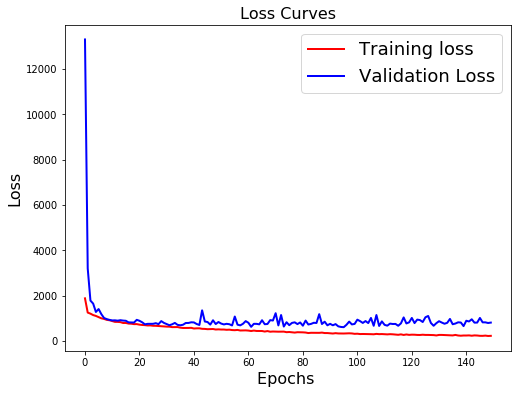

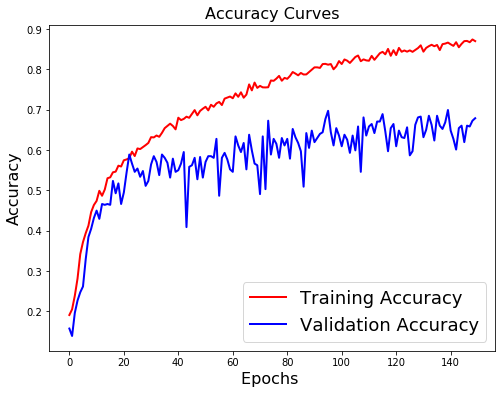

In [0]:
#Plotting accuracy and loss curves for 2nd model

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# Dot Model Runing - Nose

In [0]:
#Creating 2nd model and training(fitting)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
batch_size = 128
epochs = 150

# Fit the model on the batches generated by datagen.flow().
history = model.fit_generator(
    datagen_nose.flow(dot_nose_x_train, dot_nose_y_train, batch_size=batch_size),
    steps_per_epoch=int(np.ceil(dot_nose_x_train.shape[0] / float(batch_size))),
    epochs = epochs, 
    validation_data=(dot_nose_x_test, dot_nose_y_test), class_weight=class_weight_dot_nose)

#save the model weights
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/'
json_string = model.to_json()
model.save_weights(local_path + 'savedmodels/model_simple_dot_nose.h5')
open(local_path + 'savedmodels/model_simple_dot_nose.json', 'w').write(json_string)
#model.save_weights(local_path + 'savedmodels/Emotion_Face_Detection_Model.h5')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 35 steps, validate on 489 samples
Epoch 1/150
35/35 [==============================] - 4s 104ms/step - loss: 2078.4974 - accuracy: 0.1897 - val_loss: 9369.6567 - val_accuracy: 0.1595
Epoch 2/150
35/35 [==============================] - 2s 66ms/step - loss: 1307.1050 - accuracy: 0.2272 - val_loss: 1767.9435 - val_accuracy: 0.2495
Epoch 3/150
35/35 [==============================] - 2s 66ms/step - loss: 1193.1990 - accuracy: 0.2929 - val_loss: 1265.8705 - val_accuracy: 0.2761
Epoch 4/150
35/35 [==============================] - 2s 69ms/step - loss: 1102.9915 - accuracy: 0.3305 - val_loss: 1110.9656 - val_accuracy: 0.3272
Epoch 5/150
35/35 [==============================] - 2s 67ms/step - loss: 1054.9477 - accuracy: 0.3612 - val_loss: 1023.6820 - val_accuracy: 0.3742
Epoch 6/150
35/35 [==============================] - 2s 66ms/step - loss: 1002.0673 - accuracy: 0.3803 - val_loss: 973.7497 - val_accuracy: 0.4029
Epoch 7/150
35/35 

9697

# V. Evaluate the model

Text(0.5, 1.0, 'Accuracy Curves')

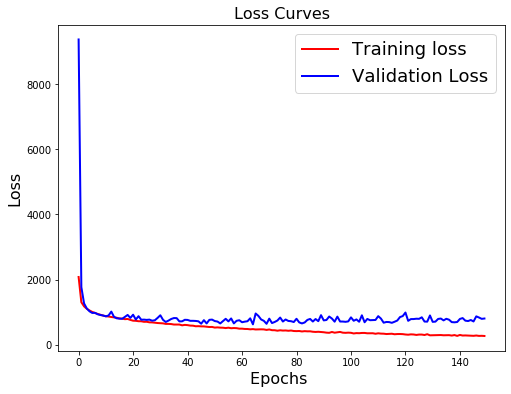

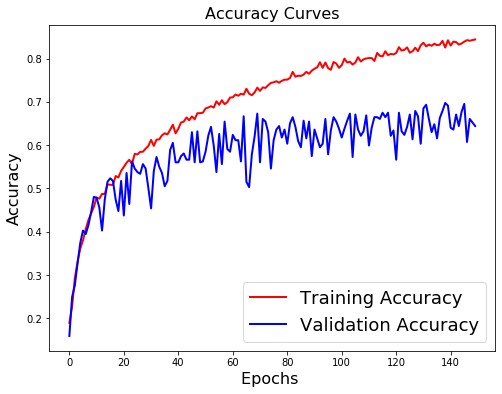

In [0]:
#Plotting accuracy and loss curves for 2nd model

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# Dot Model Runing - Mouth

In [0]:
#Creating 2nd model and training(fitting)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
batch_size = 128
epochs = 100

# Fit the model on the batches generated by datagen.flow().
history = model.fit_generator(
    datagen_mouth.flow(dot_mouth_x_train, dot_mouth_y_train, batch_size=batch_size),
    steps_per_epoch=int(np.ceil(dot_mouth_x_train.shape[0] / float(batch_size))),
    epochs = epochs, 
    validation_data=(dot_mouth_x_test, dot_mouth_y_test), class_weight=class_weight_dot_mouth)

#save the model weights
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/'
json_string = model.to_json()
model.save_weights(local_path + 'savedmodels/model_simple_dot_mouth.h5')
open(local_path + 'savedmodels/model_simple_dot_mouth.json', 'w').write(json_string)
#model.save_weights(local_path + 'savedmodels/Emotion_Face_Detection_Model.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 35 steps, validate on 489 samples
Epoch 1/100
35/35 [==============================] - 5s 153ms/step - loss: 1271.2686 - accuracy: 0.2390 - val_loss: 11329.9119 - val_accuracy: 0.1534
Epoch 2/100
35/35 [==============================] - 2s 66ms/step - loss: 1124.9786 - accuracy: 0.2940 - val_loss: 4074.7678 - val_accuracy: 0.1963
Epoch 3/100
35/35 [==============================] - 2s 66ms/step - loss: 1076.3387 - accuracy: 0.3358 - val_loss: 2238.7438 - val_accuracy: 0.2331
Epoch 4/100
35/35 [==============================] - 2s 66ms/step - loss: 1045.4024 - accuracy: 0.3433 - val_loss: 1685.2275 - val_accuracy: 0.2781
Epoch 5/100
35/35 [==============================] - 2s 66ms/step - loss: 1023.8402 - accuracy: 0.3624 - val_loss: 1350.1377 - val_accuracy: 0.3558
Epoch 6/100
35/35 [==============================] - 2s 66ms/step - loss: 999.9139 - acc

9697

# V. Evaluate the model

Text(0.5, 1.0, 'Accuracy Curves')

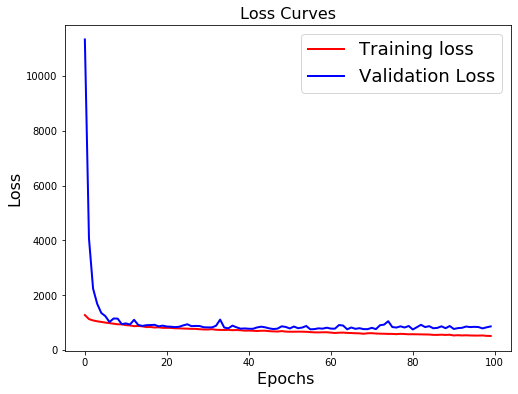

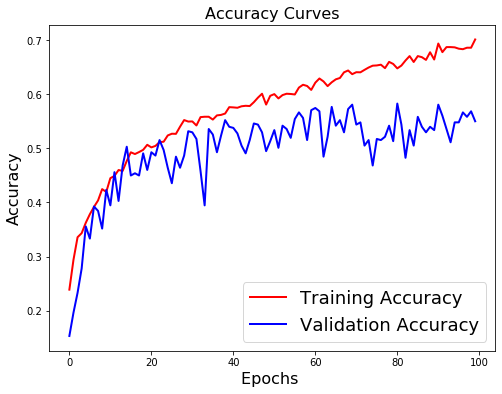

In [0]:
#Plotting accuracy and loss curves for 2nd model

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# Model Runing - Total Face

In [0]:
#Creating 2nd model and training(fitting)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
batch_size = 128
epochs = 150

# Fit the model on the batches generated by datagen.flow().
history = model.fit_generator(
    datagen_total.flow(total_x_train, total_y_train, batch_size=batch_size),
    steps_per_epoch=int(np.ceil(total_x_train.shape[0] / float(batch_size))),
    epochs = epochs, 
    validation_data=(total_x_test, total_y_test), class_weight=class_weight_eye)

#save the model weights
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/'
json_string = model.to_json()
model.save_weights(local_path + 'savedmodels/model_simple_total.h5')
open(local_path + 'savedmodels/model_simple_total.json', 'w').write(json_string)
#model.save_weights(local_path + 'savedmodels/Emotion_Face_Detection_Model.h5')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 35 steps, validate on 491 samples
Epoch 1/150
35/35 [==============================] - 4s 110ms/step - loss: 1947.7540 - accuracy: 0.1556 - val_loss: 2781.1918 - val_accuracy: 0.1792
Epoch 2/150
35/35 [==============================] - 2s 67ms/step - loss: 1482.4901 - accuracy: 0.1542 - val_loss: 1421.3605 - val_accuracy: 0.1690
Epoch 3/150
35/35 [==============================] - 2s 66ms/step - loss: 1362.2629 - accuracy: 0.1524 - val_loss: 1299.1371 - val_accuracy: 0.1629
Epoch 4/150
35/35 [==============================] - 2s 68ms/step - loss: 1320.4079 - accuracy: 0.1604 - val_loss: 1261.5470 - val_accuracy: 0.1507
Epoch 5/150
35/35 [==============================] - 2s 67ms/step - loss: 1293.2165 - accuracy: 0.1586 - val_loss: 1249.9419 - val_accuracy: 0.1568
Epoch 6/150
35/35 [==============================] - 2s 68ms/step - loss: 1284.1661 - accuracy: 0.1536 - val_loss: 1234.9936 - val_accuracy: 0.1609
Epoch 7/150
35/35

9697

# V. Evaluate the model

Text(0.5, 1.0, 'Accuracy Curves')

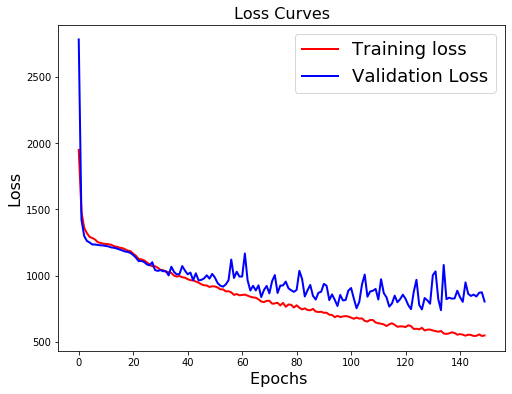

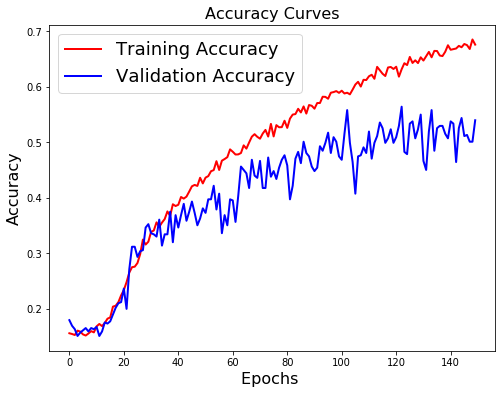

In [0]:
#Plotting accuracy and loss curves for 2nd model

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# Dot Model Runing - Total Face

In [0]:
#Creating 2nd model and training(fitting)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
batch_size = 128
epochs = 150

# Fit the model on the batches generated by datagen.flow().
history = model.fit_generator(
    datagen_total.flow(dot_total_x_train, dot_total_y_train, batch_size=batch_size),
    steps_per_epoch=int(np.ceil(dot_total_x_train.shape[0] / float(batch_size))),
    epochs = epochs, 
    validation_data=(dot_total_x_test, dot_total_y_test), class_weight=class_weight_dot_eye)

#save the model weights
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/'
json_string = model.to_json()
model.save_weights(local_path + 'savedmodels/model_simple_dot_total.h5')
open(local_path + 'savedmodels/model_simple_dot_total.json', 'w').write(json_string)
#model.save_weights(local_path + 'savedmodels/Emotion_Face_Detection_Model.h5')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 35 steps, validate on 489 samples
Epoch 1/150
35/35 [==============================] - 4s 106ms/step - loss: 3125.6841 - accuracy: 0.2440 - val_loss: 27732.4510 - val_accuracy: 0.1595
Epoch 2/150
35/35 [==============================] - 2s 68ms/step - loss: 1386.3387 - accuracy: 0.2877 - val_loss: 6119.9026 - val_accuracy: 0.2474
Epoch 3/150
35/35 [==============================] - 2s 67ms/step - loss: 1204.3873 - accuracy: 0.3063 - val_loss: 2681.4616 - val_accuracy: 0.3067
Epoch 4/150
35/35 [==============================] - 2s 68ms/step - loss: 1131.2944 - accuracy: 0.3361 - val_loss: 1792.4640 - val_accuracy: 0.3374
Epoch 5/150
35/35 [==============================] - 2s 65ms/step - loss: 1067.3719 - accuracy: 0.3618 - val_loss: 1450.7520 - val_accuracy: 0.3395
Epoch 6/150
35/35 [==============================] - 2s 66ms/step - loss: 1039.1477 - accuracy: 0.3766 - val_loss: 1355.4404 - val_accuracy: 0.3620
Epoch 7/150
35/3

9697

# V. Evaluate the model

Text(0.5, 1.0, 'Accuracy Curves')

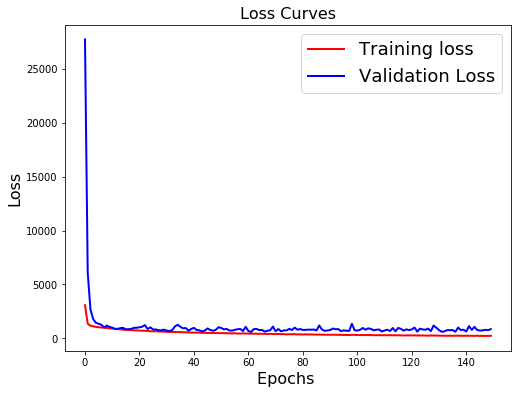

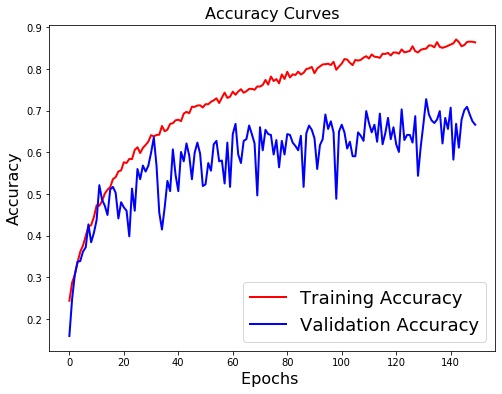

In [0]:
#Plotting accuracy and loss curves for 2nd model

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# VI. Feed the gradient image

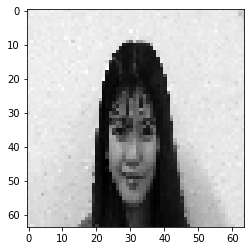

In [0]:
im = total_x_train[0].reshape(64,64)
plt.imshow(im, 'gray')

In [0]:
gx = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=1)
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

# Load Model

In [0]:
from tensorflow import keras
from keras.models import load_model

In [0]:
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/'
#local_path = 'C:/Users/1-6/DataAnalist/Jupyter_python/Emotion Recognition/'

with open(local_path + 'savedmodels/model_simple_eye.json','r') as f:
    json = f.read()
model_eye = keras.models.model_from_json(json)

model_eye.load_weights(local_path + 'savedmodels/model_simple_eye.h5')
print("Loaded model from disk")

Loaded model from disk


In [0]:
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/'
#local_path = 'C:/Users/1-6/DataAnalist/Jupyter_python/Emotion Recognition/'

with open(local_path + 'savedmodels/model_simple_nose.json','r') as f:
    json = f.read()
model_nose = keras.models.model_from_json(json)

model_nose.load_weights(local_path + 'savedmodels/model_simple_nose.h5')
print("Loaded model from disk")

Loaded model from disk


In [0]:
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/'
#local_path = 'C:/Users/1-6/DataAnalist/Jupyter_python/Emotion Recognition/'

with open(local_path + 'savedmodels/model_simple_mouth.json','r') as f:
    json = f.read()
model_mouth = keras.models.model_from_json(json)

model_mouth.load_weights(local_path + 'savedmodels/model_simple_mouth.h5')
print("Loaded model from disk")

Loaded model from disk


In [0]:
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/'
#local_path = 'C:/Users/1-6/DataAnalist/Jupyter_python/Emotion Recognition/'

with open(local_path + 'savedmodels/model_simple_total.json','r') as f:
    json = f.read()
model_total = keras.models.model_from_json(json)

model_total.load_weights(local_path + 'savedmodels/model_simple_total.h5')
print("Loaded model from disk")

Loaded model from disk


In [0]:
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/'
#local_path = 'C:/Users/1-6/DataAnalist/Jupyter_python/Emotion Recognition/'

with open(local_path + 'savedmodels/model_simple_dot_eye.json','r') as f:
    json = f.read()
model_dot_eye = keras.models.model_from_json(json)

model_dot_eye.load_weights(local_path + 'savedmodels/model_simple_dot_eye.h5')
print("Loaded model from disk")

Loaded model from disk


In [0]:
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/'
#local_path = 'C:/Users/1-6/DataAnalist/Jupyter_python/Emotion Recognition/'

with open(local_path + 'savedmodels/model_simple_dot_nose.json','r') as f:
    json = f.read()
model_dot_nose = keras.models.model_from_json(json)

model_dot_nose.load_weights(local_path + 'savedmodels/model_simple_dot_nose.h5')
print("Loaded model from disk")

Loaded model from disk


In [0]:
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/'
#local_path = 'C:/Users/1-6/DataAnalist/Jupyter_python/Emotion Recognition/'

with open(local_path + 'savedmodels/model_simple_dot_mouth.json','r') as f:
    json = f.read()
model_dot_mouth = keras.models.model_from_json(json)

model_dot_mouth.load_weights(local_path + 'savedmodels/model_simple_dot_mouth.h5')

In [0]:
local_path = 'drive/My Drive/Jupyter_python/Emotion Recognition/'
#local_path = 'C:/Users/1-6/DataAnalist/Jupyter_python/Emotion Recognition/'

with open(local_path + 'savedmodels/model_simple_dot_total.json','r') as f:
    json = f.read()
model_dot_total = keras.models.model_from_json(json)

model_dot_total.load_weights(local_path + 'savedmodels/model_simple_dot_total.h5')
print("Loaded model from disk")

Loaded model from disk


# VIII. Ensemble

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier

In [0]:
mouth_x_test = mouth_x_test[1:]
mouth_y_test = mouth_y_test[1:]
print(mouth_x_test.shape)
print(mouth_y_test.shape)

(489, 64, 64, 1)
(489, 7)


In [0]:
total = model_dot_mouth.predict_proba(dot_mouth_x_test)[40]
total

array([1.4094851e-02, 6.1702706e-02, 3.1578952e-01, 6.2355554e-07,
       2.9139230e-02, 3.5548720e-01, 2.2378592e-01], dtype=float32)

In [0]:
# Deep Learning Original file
eye = model_eye.predict_classes(eye_x_test)
nose = model_nose.predict_classes(nose_x_test)
mouth = model_mouth.predict_classes(mouth_x_test)
total = model_total.predict_classes(total_x_test)

# Deep Learning Dot file
dot_eye = model_dot_eye.predict_classes(dot_eye_x_test)
dot_nose = model_dot_nose.predict_classes(dot_nose_x_test)
dot_mouth = model_dot_mouth.predict_classes(dot_mouth_x_test)
dot_total = model_dot_total.predict_classes(dot_total_x_test)

# DataFrame
model_dot_part = pd.DataFrame({"dot_eye" : dot_eye, "dot_nose" : dot_nose, "dot_mouth" : dot_mouth})
model_dot_part2 = pd.DataFrame({"dot_eye" : dot_eye, "dot_nose" : dot_nose, "dot_total" : dot_total})
model_part = pd.DataFrame({"eye" : eye, "nose" : nose, "mouth" : mouth})
total_ori = pd.DataFrame({"total" : total})
total_dot = pd.DataFrame({"dot_total" : dot_total})

emo = ["ang", "dis", "fea", "hap", "sad", "sur", "neu"]
y_test = pd.DataFrame({"emo" : emo})


import collections, numpy
def vote_func(x, best_model_idx=0):
    p = collections.Counter(x)
    
    if p.most_common()[0][1] >=2:
        return(p.most_common()[0][0])
    else:
        return(x[best_model_idx])

In [0]:
model_part["ensemble"] = model_part.loc[:,["eye","nose","mouth"]].apply(lambda x: vote_func(x), axis=1)
model_part.tail()

,eye,nose,mouth,ensemble
484,1,0,1,1
485,6,1,6,6
486,2,2,0,2
487,0,5,6,0
488,6,6,6,6


In [0]:
model_dot_part["ensemble"] = model_dot_part.loc[:,["dot_eye","dot_nose","dot_mouth"]].apply(lambda x: vote_func(x), axis=1)
model_dot_part.tail()

,dot_eye,dot_nose,dot_mouth,ensemble
484,0,0,1,0
485,6,3,6,6
486,2,2,2,2
487,5,5,3,5
488,6,2,5,6


In [0]:
model_dot_part2["ensemble"] = model_dot_part2.loc[:,["dot_eye","dot_nose","dot_total"]].apply(lambda x: vote_func(x), axis=1)
model_dot_part2.tail()

,dot_eye,dot_nose,dot_total,ensemble
484,0,0,6,0
485,6,3,6,6
486,2,2,0,2
487,5,5,6,5
488,6,2,6,6


In [0]:
total_ori.tail()

,total
486,5
487,1
488,5
489,6
490,2


In [0]:
total_dot.tail()

,dot_total
484,6
485,6
486,0
487,6
488,6


In [0]:
from tensorflow.keras.utils import to_categorical

ori_eye_test = to_categorical(model_part["eye"])
ori_nose_test = to_categorical(model_part["nose"])
ori_mouth_test = to_categorical(model_part["mouth"])
ori_total_test = to_categorical(total_ori["total"])

ori_dot_eye_test = to_categorical(model_dot_part["dot_eye"])
ori_dot_nose_test = to_categorical(model_dot_part["dot_nose"])
ori_dot_mouth_test = to_categorical(model_dot_part["dot_mouth"])
ori_dot_total_test = to_categorical(total_dot["dot_total"])

dot_em_test = to_categorical(model_dot_part["ensemble"])
dot_em_test2 = to_categorical(model_dot_part2["ensemble"])
ori_em_test = to_categorical(model_part["ensemble"])

In [0]:
print(eye_y_test.shape)
print(ori_eye_test.shape)
print("==============")
print(mouth_y_test.shape)
print(ori_mouth_test.shape)
print("==============")
print(dot_eye_y_test.shape)
print(eye_y_test.shape)
print("==============")
print(dot_em_test.shape)
print(dot_eye_y_test.shape)

(489, 7)
(489, 7)
(489, 7)
(489, 7)
(489, 7)
(489, 7)
(489, 7)
(489, 7)


# Visualization

In [0]:
import brewer2mpl
set3 = brewer2mpl.get_map('Set3', 'qualitative', 7).mpl_colors

y_prob = model_total.predict(total_x_test, batch_size=32)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in total_y_test]


def plot_subjects(start, end, y_pred, y_true, title=False):
    fig = plt.figure(figsize=(12,12))
    emotion = {0:'Angry', 1:'Disgusting', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
    for i in range(start, end):
        input_img = total_x_test[i:(i+1),:,:,:]
        ax = fig.add_subplot(7,7,i+1)
        ax.imshow(input_img[0,:,:,0], cmap=plt.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        if y_pred[i] != y_true[i]:
            plt.xlabel(emotion[y_true[i]], color='red',fontsize=12)
        else:
            plt.xlabel(emotion[y_true[i]], fontsize=12)
        if title:
            plt.title(emotion[y_pred[i]], color='blue')
        plt.tight_layout()
    plt.show()

In [0]:
def plot_probs(start, end, y_prob):
    fig = plt.figure(figsize=(12,12))
    for i in range(start, end):
        input_img = total_x_test[i:(i+1),:,:,:]
        ax = fig.add_subplot(7,7,i+1)
        ax.bar(np.arange(0,7), y_prob[i], color=set3, alpha=0.5)
        ax.set_xticks(np.arange(0.5,6.5,1))
        labels = ['angry', 'disgusting', 'fear', 'happy', 'sad','surprise', 'neutral']
        ax.set_xticklabels(labels, rotation=90, fontsize=10)
        ax.set_yticks(np.arange(0.0,1.1,0.5))
        plt.tight_layout()
    plt.show()

In [0]:
def plot_subjects_with_probs(start, end, y_prob):
    iter = (end - start)/7
    for i in np.arange(0,iter):
        plot_subjects(int(i*7),int((i+1)*7), y_pred, y_true, title=False)
        plot_probs(int(i*7),int((i+1)*7), y_prob)

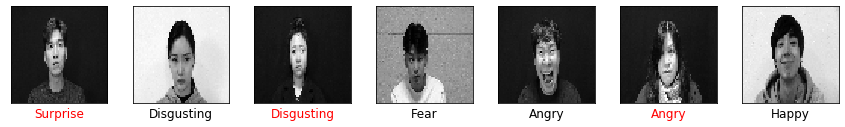

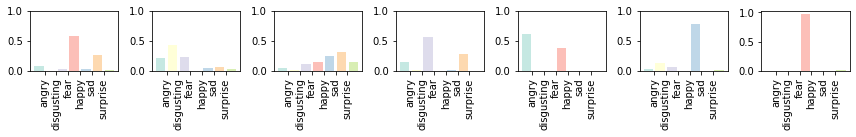

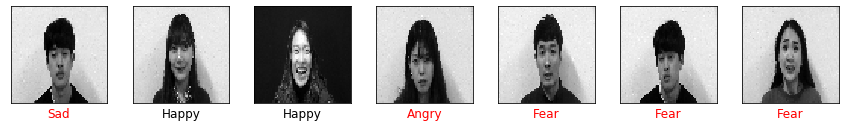

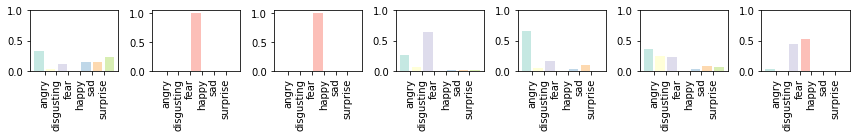

In [0]:
plot_subjects_with_probs(0, 14, y_prob)

# Accuracy

In [0]:
# categorical reverse
eye_y_np = np.argmax(eye_y_test, axis=1)
nose_y_np = np.argmax(nose_y_test, axis=1)
mouth_y_np = np.argmax(mouth_y_test, axis=1)
total_y_np = np.argmax(total_y_test, axis=1)

dot_eye_y_np = np.argmax(dot_eye_y_test, axis=1)
dot_nose_y_np = np.argmax(dot_nose_y_test, axis=1)
dot_mouth_y_np = np.argmax(dot_mouth_y_test, axis=1)
dot_total_y_np = np.argmax(dot_total_y_test, axis=1)

ensemble_y_np = np.argmax(ori_em_test, axis=1)
ensemble_dot_y_np = np.argmax(dot_em_test2, axis=1)

In [0]:
print('Eye 감정별 정답률')
for i in range(7):
    prob = sum((eye_y_np == i) & (eye_y_np == eye)) / sum(eye_y_np == i)
    print("emotion " + y_test['emo'][i] + " : ", prob)

print('Nose 감정별 정답률')
for i in range(7):
    prob = sum((nose_y_np == i) & (nose_y_np == nose)) / sum(nose_y_np == i)
    print("emotion " + y_test['emo'][i] + " : ", prob)

print('Mouth 감정별 정답률')
for i in range(7):
    prob = sum((mouth_y_np == i) & (mouth_y_np == mouth)) / sum(mouth_y_np == i)
    print("emotion " + y_test['emo'][i] + " : ", prob)

print('Total 감정별 정답률')
for i in range(7):
    prob = sum((total_y_np == i) & (total_y_np == total)) / sum(total_y_np == i)
    print("emotion " + y_test['emo'][i] + " : ", prob)

Eye 감정별 정답률
emotion ang :  0.7435897435897436
emotion dis :  0.5866666666666667
emotion fea :  0.5857142857142857
emotion hap :  0.953125
emotion sad :  0.7
emotion sur :  0.9253731343283582
emotion neu :  0.5076923076923077
Nose 감정별 정답률
emotion ang :  0.7435897435897436
emotion dis :  0.52
emotion fea :  0.4142857142857143
emotion hap :  0.75
emotion sad :  0.6285714285714286
emotion sur :  0.6865671641791045
emotion neu :  0.6307692307692307
Mouth 감정별 정답률
emotion ang :  0.6666666666666666
emotion dis :  0.41333333333333333
emotion fea :  0.4142857142857143
emotion hap :  0.875
emotion sad :  0.42028985507246375
emotion sur :  0.6567164179104478
emotion neu :  0.8333333333333334
Total 감정별 정답률
emotion ang :  0.5189873417721519
emotion dis :  0.3333333333333333
emotion fea :  0.3142857142857143
emotion hap :  0.9375
emotion sad :  0.6142857142857143
emotion sur :  0.582089552238806
emotion neu :  0.5303030303030303


In [0]:
print('Dot Eye 감정별 정답률')
for i in range(7):
    prob = sum((dot_eye_y_np == i) & (dot_eye_y_np == dot_eye)) / sum(dot_eye_y_np == i)
    print("emotion " + y_test['emo'][i] + " : ", prob)

print('Dot Nose 감정별 정답률')
for i in range(7):
    prob = sum((dot_nose_y_np == i) & (dot_nose_y_np == dot_nose)) / sum(dot_nose_y_np == i)
    print("emotion " + y_test['emo'][i] + " : ", prob)

print('Dot Mouth 감정별 정답률')
for i in range(7):
    prob = sum((dot_mouth_y_np == i) & (dot_mouth_y_np == dot_mouth)) / sum(dot_mouth_y_np == i)
    print("emotion " + y_test['emo'][i] + " : ", prob)

print('Dot Total 감정별 정답률')
for i in range(7):
    prob = sum((dot_total_y_np == i) & (dot_total_y_np == dot_total)) / sum(dot_total_y_np == i)
    print("emotion " + y_test['emo'][i] + " : ", prob)

Dot Eye 감정별 정답률
emotion ang :  0.6538461538461539
emotion dis :  0.5333333333333333
emotion fea :  0.5
emotion hap :  0.890625
emotion sad :  0.7
emotion sur :  0.8805970149253731
emotion neu :  0.6307692307692307
Dot Nose 감정별 정답률
emotion ang :  0.5641025641025641
emotion dis :  0.6266666666666667
emotion fea :  0.5571428571428572
emotion hap :  0.9375
emotion sad :  0.6
emotion sur :  0.8955223880597015
emotion neu :  0.35384615384615387
Dot Mouth 감정별 정답률
emotion ang :  0.6025641025641025
emotion dis :  0.52
emotion fea :  0.4
emotion hap :  0.984375
emotion sad :  0.37142857142857144
emotion sur :  0.6268656716417911
emotion neu :  0.5384615384615384
Dot Total 감정별 정답률
emotion ang :  0.7307692307692307
emotion dis :  0.5066666666666667
emotion fea :  0.5142857142857142
emotion hap :  0.984375
emotion sad :  0.5142857142857142
emotion sur :  0.9552238805970149
emotion neu :  0.49230769230769234


In [0]:
print('Ensemble 감정별 정답률')
for i in range(7):
    prob = sum((eye_y_np == i) & (eye_y_np == model_part["ensemble"])) / sum(eye_y_np == i)
    print("emotion " + y_test['emo'][i] + " : ", prob)

Ensemble Total 감정별 정답률
emotion ang :  0.8076923076923077
emotion dis :  0.64
emotion fea :  0.5142857142857142
emotion hap :  0.96875
emotion sad :  0.7
emotion sur :  0.9253731343283582
emotion neu :  0.6615384615384615


In [0]:
print('Ensemble Dot 감정별 정답률')
for i in range(7):
    prob = sum((dot_eye_y_np == i) & (dot_eye_y_np == model_dot_part2["ensemble"])) / sum(dot_eye_y_np == i)
    print("emotion " + y_test['emo'][i] + " : ", prob)

Ensemble Total 감정별 정답률
emotion ang :  0.782051282051282
emotion dis :  0.6266666666666667
emotion fea :  0.5142857142857142
emotion hap :  0.953125
emotion sad :  0.7428571428571429
emotion sur :  0.9701492537313433
emotion neu :  0.5846153846153846


In [0]:
print('Eye Test accuracy:', accuracy_score(eye_y_test, ori_eye_test))
print('Nose Test accuracy:', accuracy_score(nose_y_test, ori_nose_test))
print('Mouth Test accuracy:', accuracy_score(mouth_y_test, ori_mouth_test))
print('Total Test accuracy:', accuracy_score(total_y_test, ori_total_test))
print('Dot Eye Test accuracy:', accuracy_score(dot_eye_y_test, ori_dot_eye_test))
print('Dot Nose Test accuracy:', accuracy_score(dot_nose_y_test, ori_dot_nose_test))
print('Dot Mouth Test accuracy:', accuracy_score(dot_mouth_y_test, ori_dot_mouth_test))
print('Dot Total Test accuracy:', accuracy_score(dot_total_y_test, ori_dot_total_test))

Eye Test accuracy: 0.7116564417177914
Nose Test accuracy: 0.623721881390593
Mouth Test accuracy: 0.6053169734151329
Total Test accuracy: 0.539714867617108
Dot Eye Test accuracy: 0.6789366053169734
Dot Nose Test accuracy: 0.6441717791411042
Dot Mouth Test accuracy: 0.5725971370143149
Dot Total Test accuracy: 0.6666666666666666


In [0]:
print('Ensemble Test accuracy:', accuracy_score(eye_y_test, ori_em_test))
print('Ensemble Dot Test accuracy:', accuracy_score(dot_eye_y_test, dot_em_test))
print('Ensemble Dot Test2 accuracy:', accuracy_score(dot_eye_y_test, dot_em_test2))

Ensemble Test accuracy: 0.7423312883435583
Ensemble Dot Test accuracy: 0.7177914110429447
Ensemble Dot Test2 accuracy: 0.7361963190184049


# Random Image

In [0]:
import os
name = os.listdir("drive/My Drive/rnd/")

path = []
for i in range(0, len(name)):
    path.append("drive/My Drive/rnd/" + name[i])

In [0]:
y_prob = model_total.predict(total_x_test, batch_size=32)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in total_y_test]


plot_subjects_with_probs(0, 4, y_prob)

# Sources

- Visualization : https://github.com/JostineHo/mememoji/blob/master/data_visualization.ipynb
- State of the art Architecture : https://github.com/amineHorseman/facial-expression-recognition-using-cnn
- Eyes Tracking : https://www.pyimagesearch.com/2017/04/24/eye-blink-detection-opencv-python-dlib/
- Face Alignment : https://www.pyimagesearch.com/2017/05/22/face-alignment-with-opencv-and-python/
- C.Pramerdorfer,  and  M.Kampel.Facial  Expression  Recognition  using  Con-volutional  Neural  Networks:  State  of  the  Art.  Computer  Vision  Lab,  TU  Wien. https://arxiv.org/pdf/1612.02903.pdf
- A Brief Review of Facial Emotion Recognition Based
on Visual Information : https://www.mdpi.com/1424-8220/18/2/401/pdf
- Going deeper in facial expression recognition using deep neural networks : https://ieeexplore.ieee.org/document/7477450